In [65]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [81]:
dataset = 'ssc.hg38'
subtype = 'life'

In [82]:
intervals = np.load('../permutation_tests/phen.%s.intervals.npy' % dataset)
chroms = np.load('../permutation_tests/phen.%s.chroms.npy' % dataset)
print(intervals.shape, chroms.shape)

(2, 1322426) (1322426,)


In [83]:
chrom_lengths38 = {
	'1': 248956422,
	'2': 242193529,
	'3': 198295559,
	'4': 190214555,
	'5': 181538259,
	'6': 170805979,
	'7': 159345973,
	'8': 145138636,
	'9': 138394717,
	'10': 133797422,
	'11': 135086622,
	'12': 133275309,
	'13': 114364328,
	'14': 107043718,
	'15': 101991189,
	'16': 90338345,
	'17': 83257441,
	'18': 80373285,
	'19': 58617616,
	'20': 64444167,
	'21': 46709983,
	'22': 50818468,
	'X': 156040895,
#	'Y': 57227415
}

chrom_to_offset = dict()
offset = 0
for chrom in range(1, 23):
    chrom_to_offset[chrom] = offset
    offset += chrom_lengths38[str(chrom)]
    
x = intervals[0, :] + np.array([chrom_to_offset[x] for x in chroms])

In [84]:
categories = [
    'com', 'com', 'rep', 'soc', 'com', 'com', 'rep', 'rep', 'soc', 'com', 
    'rep', 'rep', 'rep', 'rep', 'rep', 'rep', 'rep', 'soc', 'soc', 'soc', 
    'soc', 'soc', 'com', 'com', 'com', 'soc', 'soc', 'soc', 'soc', 'soc', 
    'soc', 'com', 'soc', 'soc', 'soc', 'soc', 'soc', 'soc', 'soc', 'soc'
]

In [90]:
pvalues = np.ones((40, intervals.shape[1]))
for i in range(40):
    filename = '../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype)
    try:
        pvalues[i, :] = np.load('../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype))
    except:
        print(filename, 'not found')
print(pvalues.shape)



../permutation_tests/scq1.ssc.hg38.life.npy not found
../permutation_tests/scq28.ssc.hg38.life.npy not found
(40, 1322426)


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


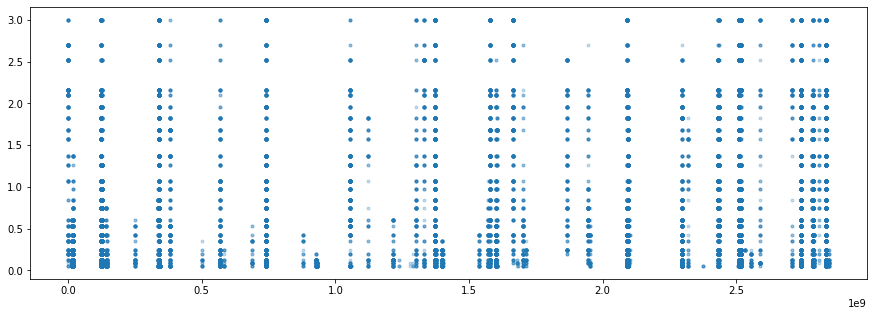

In [97]:
plt.figure(figsize=(15, 5))
i = 5
indices = pvalues[i, :]<0.9
plt.scatter(x[indices], -np.log10(pvalues[i, indices]), marker='.', alpha=0.25)
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


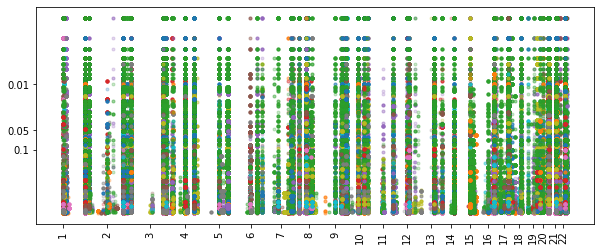

In [91]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(40):
    indices = pvalues[i, :]<0.9
    subplots.scatter(x[indices], -np.log10(pvalues[i, indices]), marker='.', alpha=0.25)
        
    
    
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.show()

In [75]:
pvalues_comb = []
for i, j in combinations(np.arange(40), 2):
    try:
        pvalues_comb.append(np.load('../permutation_tests/combinations/scq%d.%d.%s.npy' % (i+1, j+1, dataset)))
    except:
        pass
    
pvalues_comb = np.array(pvalues_comb)
print(pvalues_comb.shape)

(272, 386437)


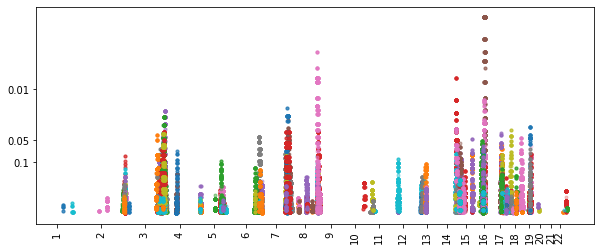

In [77]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(pvalues_comb.shape[0]):
    indices = pvalues_comb[i, :]<0.5
    subplots.scatter(x[indices], -np.log10(pvalues_comb[i, indices]), marker='.', alpha=0.25)
        
  
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.show()